In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
pio.renderers.default = "svg"

In [2]:
df = pd.read_csv("../Data/customer_dataset.csv")
df.head()

,Customer_ID,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership_Type           350 non-null    object 
 5   Total_Spend               350 non-null    float64
 6   Items_Purchased           350 non-null    int64  
 7   Average_Rating            350 non-null    float64
 8   Discount_Applied          350 non-null    bool   
 9   Days_Since_Last_Purchase  350 non-null    int64  
 10  Satisfaction_Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [4]:
df.dtypes


Customer_ID                   int64
Gender                       object
Age                           int64
City                         object
Membership_Type              object
Total_Spend                 float64
Items_Purchased               int64
Average_Rating              float64
Discount_Applied               bool
Days_Since_Last_Purchase      int64
Satisfaction_Level           object
dtype: object

In [5]:
df.isnull().sum()


Customer_ID                 0
Gender                      0
Age                         0
City                        0
Membership_Type             0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Discount_Applied            0
Days_Since_Last_Purchase    0
Satisfaction_Level          2
dtype: int64

In [6]:

df.describe()

,Customer_ID,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [7]:
df.drop(columns=['Customer_ID'], inplace=True)

df.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


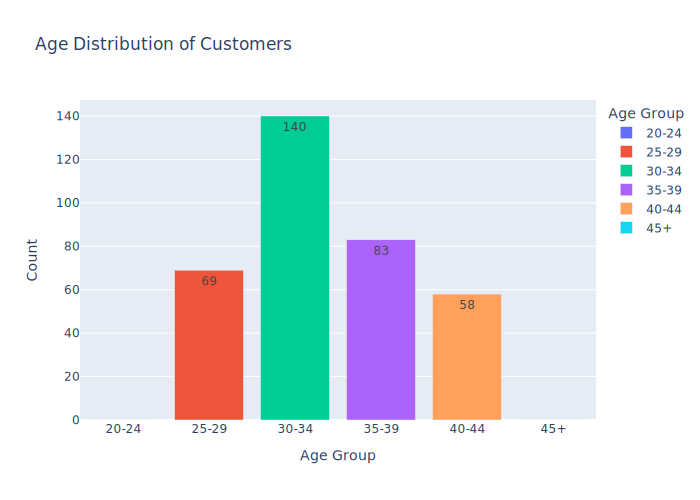

In [20]:
age_bins = [20, 25, 30, 35, 40, 45, float('inf')]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45+']

df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = df['AgeBin'].value_counts().sort_index().reset_index()
age_counts.columns = ['Age Group', 'Count']

fig = px.bar(
    age_counts,
    x='Age Group',
    y='Count',
    title="Age Distribution of Customers",
    text='Count',
    color='Age Group'
)

fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Count",
    xaxis={'categoryorder': 'array', 'categoryarray': age_labels}
)

# Show plot
fig.show()

C:\Users\yatik\AppData\Local\Temp\ipykernel_6496\705184616.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



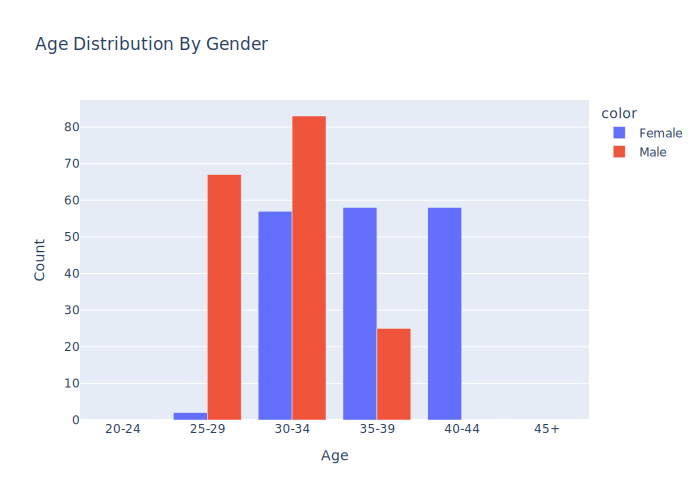

In [21]:
age_gender_dist = df.groupby(['Gender', 'AgeBin'])['Gender'].size().reset_index(name='Count')

fig = px.bar(
    x=age_gender_dist.AgeBin,
    y=age_gender_dist.Count,
    color=age_gender_dist.Gender,
    title="Age Distribution By Gender",
    barmode="group",
)

fig.update_xaxes(title="Age")
fig.update_yaxes(title="Count")

fig.show()

In [22]:
df['Age'].describe()

count    350.000000
mean      33.597143
std        4.870882
min       26.000000
25%       30.000000
50%       32.500000
75%       37.000000
max       43.000000
Name: Age, dtype: float64

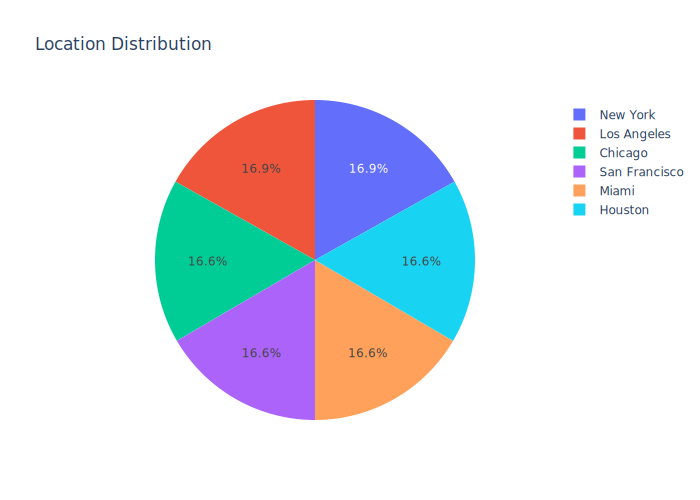

In [24]:
city_dist = df.City.value_counts()

# color according to the location
fig = px.pie(
    city_dist,
    names=city_dist.index,
    values=city_dist.values,
    title="Location Distribution",
    color=city_dist.index,
)
fig.show()

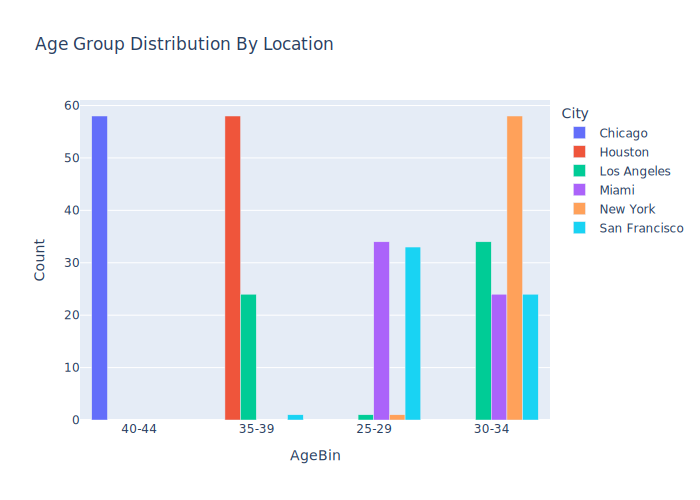

In [26]:
city_age_dist = df.groupby(['City', 'AgeBin'], observed=True)['City'].count().reset_index(name='Count')

fig = px.bar(
    city_age_dist,
    x='AgeBin',
    y='Count',
    color='City',
    title="Age Group Distribution By Location",
    barmode="group",
)

fig.update_xaxes(title="AgeBin")
fig.update_yaxes(title="Count")

fig.show()